<a href="https://colab.research.google.com/github/Andreher00/ml-project/blob/main/progetto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/progettoML/brain_counts.csv.gz')
annotations = pd.read_csv('/content/drive/MyDrive/progettoML/brain_metadata.csv')

In [ ]:
data.shape

(3401, 23434)

In [ ]:
data.head()

,Unnamed: 0,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
0,A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,54,0
1,A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A1.MAA000560.3_10_M.1.1,0,348,0,0,0,5,0,0,0,...,0,0,0,0,0,195,0,0,113,0
3,A1.MAA000564.3_10_M.1.1,0,41,36,0,0,24,0,0,0,...,0,0,0,0,125,0,1,0,0,0
4,A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,...,0,0,0,81,0,0,0,0,0,0


In [ ]:
annotations.head()

,cell,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode
0,A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290
1,A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728
2,A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560
3,A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564
4,A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923


In [5]:
data.index = data['Unnamed: 0']

In [6]:
data = data.drop('Unnamed: 0', axis=1)
# change index name to cell
data.index.name = 'cell'

In [ ]:
data.head()

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
cell,,,,,,,,,,,,,,,,,,,,,
A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,54,0
A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1.MAA000560.3_10_M.1.1,0,348,0,0,0,5,0,0,0,0,...,0,0,0,0,0,195,0,0,113,0
A1.MAA000564.3_10_M.1.1,0,41,36,0,0,24,0,0,0,14,...,0,0,0,0,125,0,1,0,0,0
A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,0,...,0,0,0,81,0,0,0,0,0,0


In [7]:
annotations.index = annotations["cell"]

In [8]:
annotations = annotations.drop('cell', axis=1)

In [9]:
annotations = annotations["cell_ontology_class"]

In [ ]:
annotations

cell
A1.B003290.3_38_F.1.1                           astrocyte
A1.B003728.3_56_F.1.1                           astrocyte
A1.MAA000560.3_10_M.1.1                   oligodendrocyte
A1.MAA000564.3_10_M.1.1                  endothelial cell
A1.MAA000923.3_9_M.1.1                          astrocyte
                                        ...              
P9.MAA000926.3_9_M.1.1     oligodendrocyte precursor cell
P9.MAA000930.3_8_M.1.1                          astrocyte
P9.MAA000932.3_11_M.1.1                  endothelial cell
P9.MAA000935.3_8_M.1.1                    oligodendrocyte
P9.MAA001894.3_39_F.1.1                         astrocyte
Name: cell_ontology_class, Length: 3401, dtype: object

In [10]:
data = data.join(annotations, how='inner')

In [ ]:
data.head()

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene,cell_ontology_class
cell,,,,,,,,,,,,,,,,,,,,,
A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,54,0,astrocyte
A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,0,...,0,0,0,0,0,0,0,0,0,astrocyte
A1.MAA000560.3_10_M.1.1,0,348,0,0,0,5,0,0,0,0,...,0,0,0,0,195,0,0,113,0,oligodendrocyte
A1.MAA000564.3_10_M.1.1,0,41,36,0,0,24,0,0,0,14,...,0,0,0,125,0,1,0,0,0,endothelial cell
A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,0,...,0,0,81,0,0,0,0,0,0,astrocyte


In [11]:
X = data.drop('cell_ontology_class', axis=1)
y = data['cell_ontology_class']

In [12]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)

In [ ]:
# apply support vector machine to predict cell type
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_pca, y_train)

SVC()

In [ ]:
# apply PCA to test set
X_test_pca = pca.transform(X_test)

In [ ]:
# predict cell type
y_pred = svc.predict(X_test_pca)

In [ ]:
# evaluate model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7978848413631022

In [ ]:
# print f1 score and plot confusion matrix
from sklearn.metrics import f1_score, confusion_matrix
print(f1_score(y_test, y_pred, average='weighted'))

0.781234555115287


In [ ]:
confusion_matrix(y_test, y_pred)

array([[  0,   4,   0,   1,   0,   1,   0],
       [  0,  64,   0,  25,   0,   3,   1],
       [  0,   0,  16,  23,   1,   0,   0],
       [  0,   0,   0, 183,   0,   1,   0],
       [  1,   0,   0,  55,  28,   0,   3],
       [  0,   1,   0,  11,   2, 372,   0],
       [  0,   5,   0,  28,   3,   3,  16]], dtype=int64)

<Axes: >

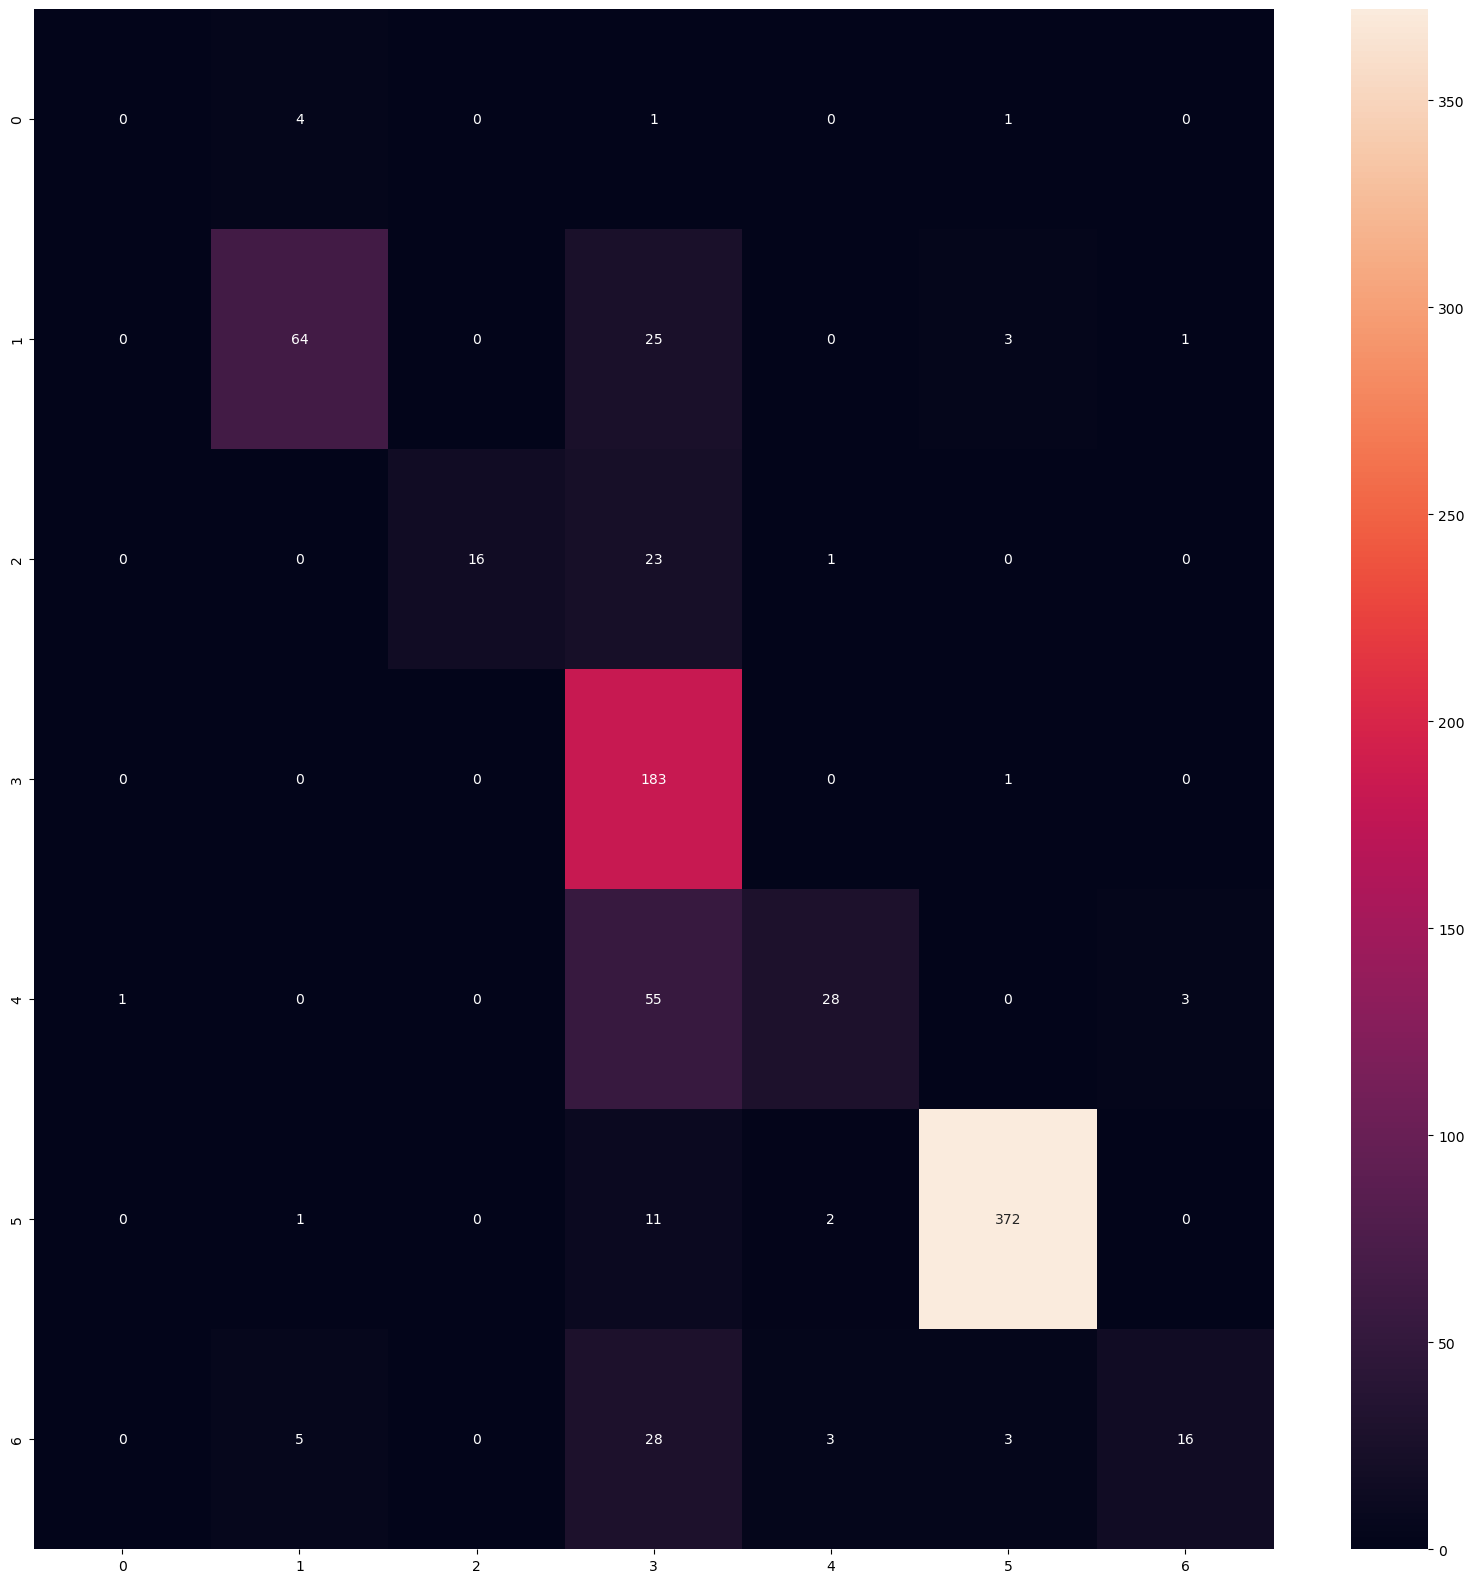

In [ ]:
# plot confusion matrix
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')


In [ ]:
# apply random forest to predict cell type
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_pca, y_train)


RandomForestClassifier()

In [ ]:
# predict cell type
y_pred = rfc.predict(X_test_pca)


In [ ]:
# evaluate model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9753231492361927

In [ ]:
# print f1 score and plot confusion matrix
from sklearn.metrics import f1_score, confusion_matrix
print(f1_score(y_test, y_pred, average='weighted'))

0.975074348190472


<Axes: >

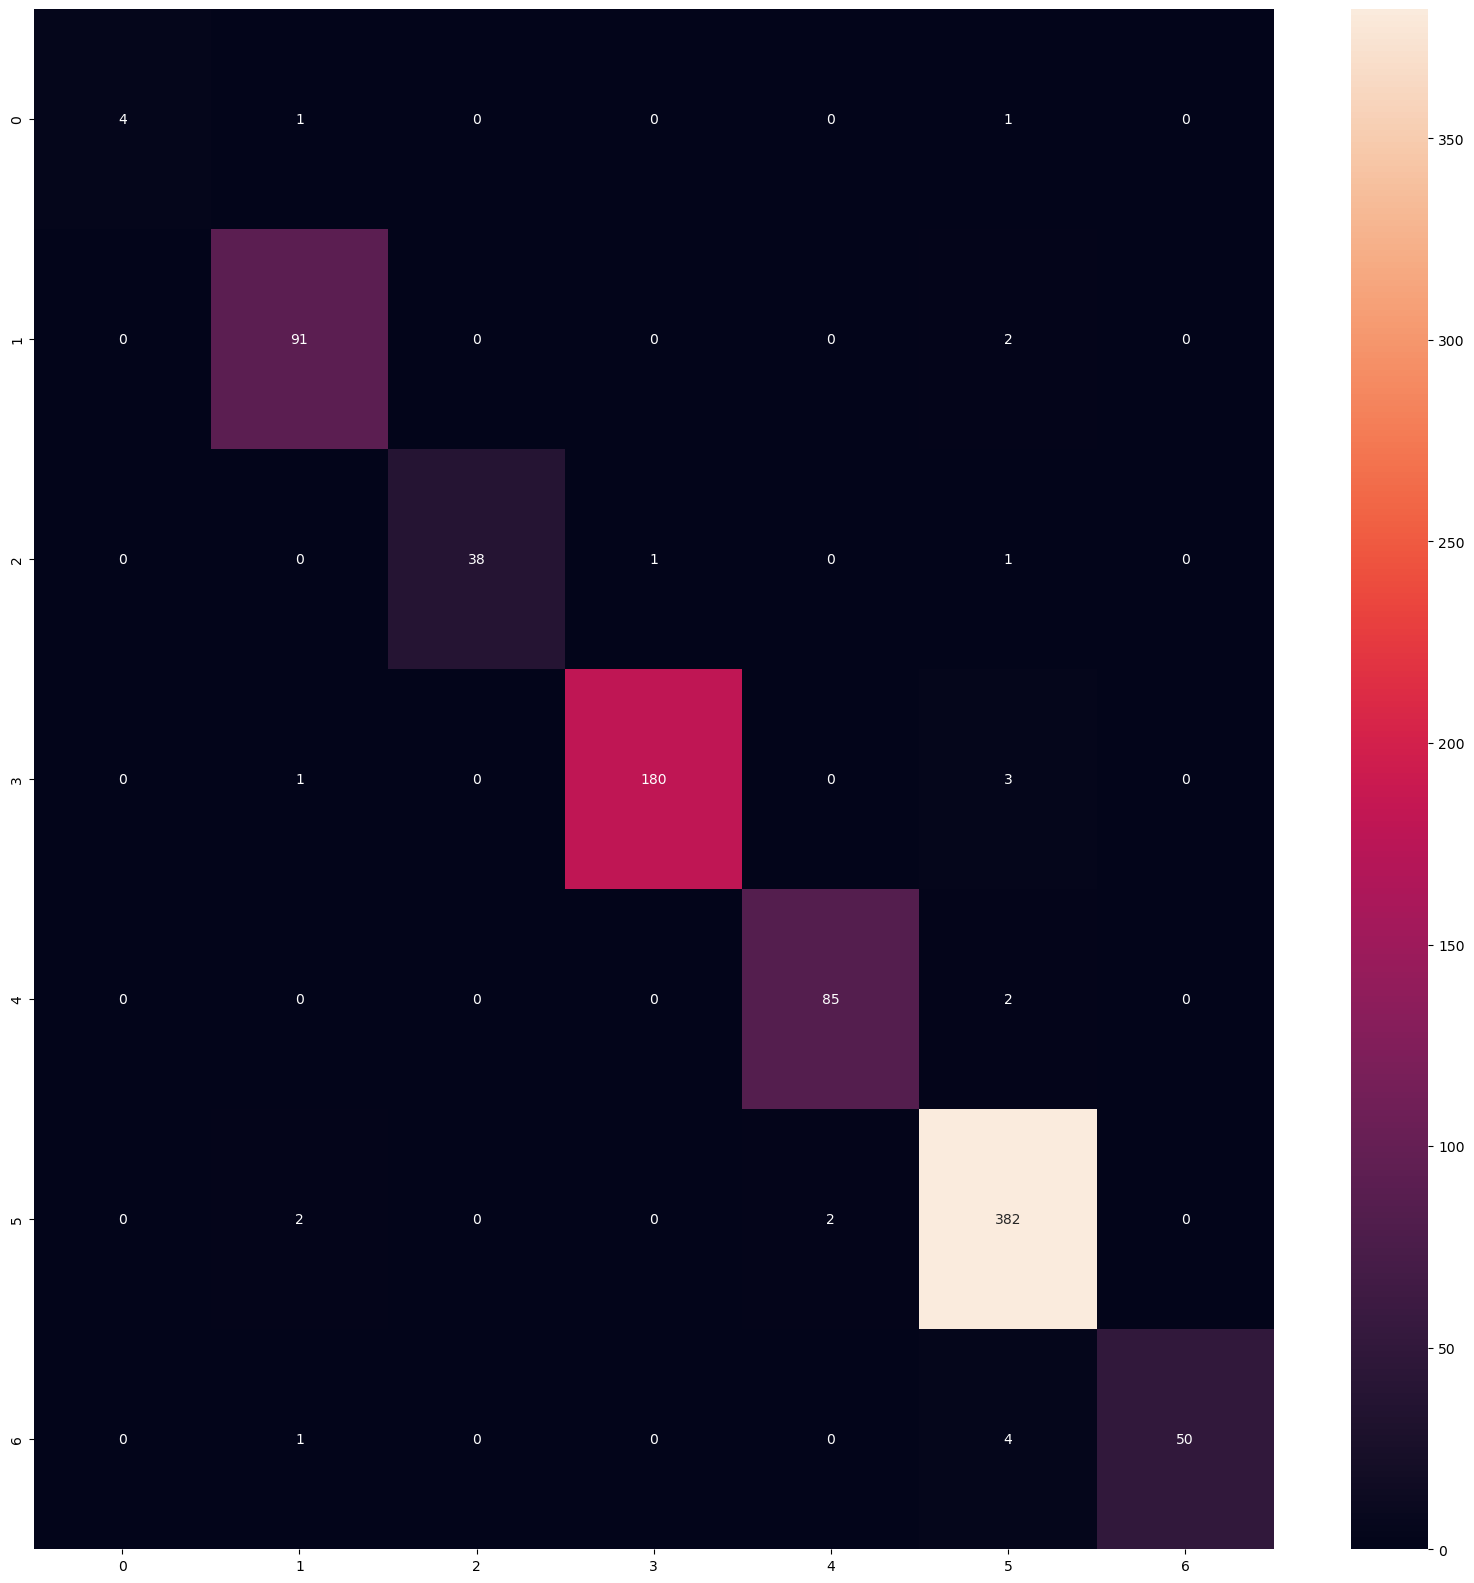

In [ ]:
# plot confusion matrix
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')



# PIPELINE SVM

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pca = PCA(n_components=50)
scaler = StandardScaler()
svm = SVC()
pipe = Pipeline([('scaler', scaler), ('pca', pca), ('svm', svm)])

param_grid = {
	"svm__C": [0.01, 0.05, 0.1],
	"svm__kernel": ["linear", "rbf", "poly"],
	# "svm__degree": range(2, 6) # degree for polynomial kernel
}


In [25]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=3)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=50)),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.01, 0.05, 0.1],
                         'svm__degree': range(2, 6),
                         'svm__kernel': ['linear', 'poly']},
             verbose=3)

In [33]:
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)

Best parameter (CV score=0.955):
{'pca__n_components': 50, 'rfc__n_estimators': 150}


# PIPELINE RANDOM FOREST

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pca = PCA()
scaler = StandardScaler()
rfc = RandomForestClassifier()
pipe = Pipeline([('scaler', scaler), ('pca', pca), ('rfc', rfc)])

param_grid = {
    "pca__n_components": [30, 50, 100],
    "rfc__n_estimators": [100, 150, 200],
}

In [32]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [30, 50, 100],
                         'rfc__n_estimators': [100, 150, 200]},
             verbose=3)

In [34]:
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)

Best parameter (CV score=0.955):
{'pca__n_components': 50, 'rfc__n_estimators': 150}


In [39]:
grid.score(X_test, y_test)

0.9623971797884842

In [40]:
estimator = grid.best_estimator_


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=50)),
                ('rfc', RandomForestClassifier(n_estimators=150))])

In [43]:
y_pred = estimator.predict(X_test)
from sklearn.metrics import f1_score, confusion_matrix
print(f1_score(y_test, y_pred, average='weighted'))

0.96209127507752
